# **Apartat 3**

En l'apartat 7 dels apunts hem vist una gràfica, també publicada per Our World in Data, que mostra les distribucions de les alçades de les dones de 20 països del Primer Món nascudes entre 1980 i 1990. L'alçada mitjana és de 164,7 cm, amb una desviació estàndard de 7,1 cm.

Crea un altre quadern de Jupyter o Colab on has de fer amb Python (emprant les llibreries que vulguis) el següent:

1. Crea una mostra aleatòria de 1000 elements (individus) que representi les alçades de 1000 dones. Utilitza un decimal de precisió per a cada valor de la mostra.
2. Dibuixa l'histograma de la mostra.
3. Obté els intervals de confiança per a la mitjana amb un nivell de confiança del 90%, 95% i 99%.
4. Calcula les probabilitats següents (expressades en percentatge):
  - Que una dona sigui més baixa de 160 cm
  - Que estigui entre 160 i 170 cm, sense arribar a 170 cm
  - Que estigui entre 170 i 180 cm, sense arribar a 180 cm
  - Que sigui faci 180 cm o més




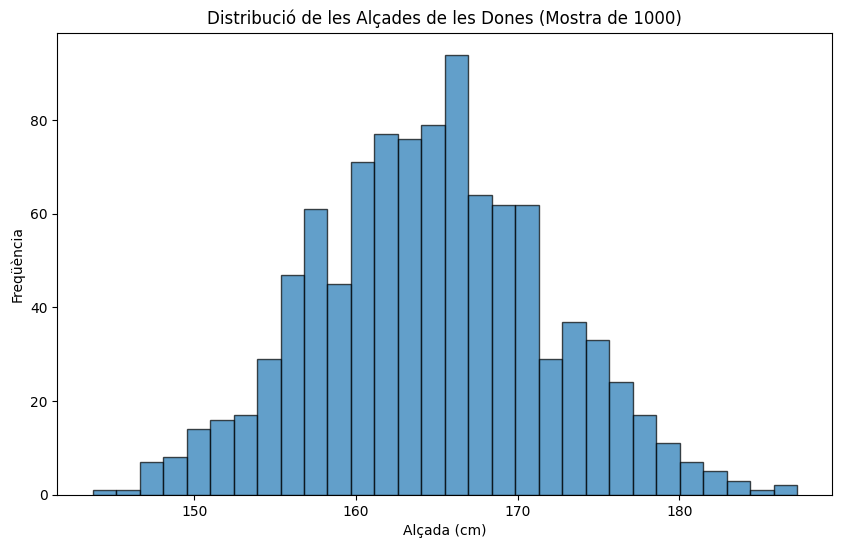

Intervals de confiança per a la mitjana:
90%: (164.33069464460834, 165.06930535539163)
95%: (164.25994552706376, 165.1400544729362)
99%: (164.1216703901256, 165.2783296098744)

Probabilitats:
Probabilitat de ser més baixa de 160 cm: 25.40%
Probabilitat de estar entre 160 i 170 cm: 51.83%
Probabilitat de estar entre 170 i 180 cm: 21.21%
Probabilitat de fer 180 cm o més: 1.56%


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Paràmetres de la distribució normal
mean_height = 164.7  # mitjana en cm
std_dev = 7.1        # desviació estàndard en cm

# Generació de la mostra aleatòria
sample_size = 1000
heights = np.round(np.random.normal(mean_height, std_dev, sample_size), 1)

# Dibuixar l'histograma
plt.figure(figsize=(10, 6))
plt.hist(heights, bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribució de les Alçades de les Dones (Mostra de 1000)")
plt.xlabel("Alçada (cm)")
plt.ylabel("Freqüència")
plt.show()

# Calcul dels intervals de confiança
confidence_levels = [0.90, 0.95, 0.99]
intervals = {}

for confidence in confidence_levels:
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    margin_of_error = z_score * (std_dev / np.sqrt(sample_size))
    interval = (mean_height - margin_of_error, mean_height + margin_of_error)
    intervals[f"{int(confidence * 100)}%"] = interval

print("Intervals de confiança per a la mitjana:")
for confidence, interval in intervals.items():
    print(f"{confidence}: {interval}")

# Calcul de probabilitats
prob_less_than_160 = stats.norm.cdf(160, mean_height, std_dev)
prob_between_160_and_170 = stats.norm.cdf(170, mean_height, std_dev) - stats.norm.cdf(160, mean_height, std_dev)
prob_between_170_and_180 = stats.norm.cdf(180, mean_height, std_dev) - stats.norm.cdf(170, mean_height, std_dev)
prob_180_or_more = 1 - stats.norm.cdf(180, mean_height, std_dev)

print("\nProbabilitats:")
print(f"Probabilitat de ser més baixa de 160 cm: {prob_less_than_160 * 100:.2f}%")
print(f"Probabilitat de estar entre 160 i 170 cm: {prob_between_160_and_170 * 100:.2f}%")
print(f"Probabilitat de estar entre 170 i 180 cm: {prob_between_170_and_180 * 100:.2f}%")
print(f"Probabilitat de fer 180 cm o més: {prob_180_or_more * 100:.2f}%")